In [562]:
#Dependancies

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import numpy as np


In [589]:
# Show all rows in the dataframe to inspect data
# pd.set_option('display.max_rows', None)

df_a = pd.read_csv("./Resources/tech_layoffs.csv")
df_a = df_a[df_a['Country'] == "USA"]


df_a.head(20)


,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,1171,Google,San Francisco Bay Area,USA,North America,12000,2023-01-20 00:00:00 UTC,6.000000,200000,188000,Consumer,Post-IPO,$26,2023,37.38605,-122.08385
1,1654,Meta,San Francisco Bay Area,USA,North America,11000,2022-11-09 00:00:00 UTC,13.000000,84615,73615,Consumer,Post-IPO,$26000,2022,37.45383,-122.18219
2,846,Meta,San Francisco Bay Area,USA,North America,10000,2023-03-14 00:00:00 UTC,13.584117,73615,63615,Consumer,Post-IPO,$26000,2023,37.45383,-122.18219
3,1204,Microsoft,Seattle,USA,North America,10000,2023-01-18 00:00:00 UTC,5.000000,200000,190000,Other,Post-IPO,$1,2023,47.60621,-122.33207
4,1586,Amazon,Seattle,USA,North America,10000,2022-11-16 00:00:00 UTC,3.000000,333333,323333,Retail,Post-IPO,$108,2022,47.60621,-122.33207
5,829,Amazon,Seattle,USA,North America,9000,2023-03-20 00:00:00 UTC,2.295918,392000,383000,Retail,Post-IPO,$108,2023,47.60621,-122.33207
8,1346,Amazon,Seattle,USA,North America,8000,2023-01-04 00:00:00 UTC,2.000000,400000,392000,Retail,Post-IPO,$108,2023,47.60621,-122.33207
9,1347,SaleSan Franciscoorce,San Francisco Bay Area,USA,North America,8000,2023-01-04 00:00:00 UTC,10.000000,80000,72000,Sales,Post-IPO,$65,2023,37.77493,-122.41942
10,1359,Micron,Boise,USA,North America,4800,2023-01-01 00:00:00 UTC,10.000000,48000,43200,Hardware,Post-IPO,$50,2023,43.61350,-116.20345
11,1587,Cisco,San Francisco Bay Area,USA,North America,4100,2022-11-16 00:00:00 UTC,5.000000,82000,77900,Infrastructure,Post-IPO,$2,2022,37.33939,-121.89496


In [590]:
# Check data types
df_a.dtypes
print(df_a.dtypes)


#                                int64
Company                         object
Location_HQ                     object
Country                         object
Continent                       object
Laid_Off                         int64
Date_layoffs                    object
Percentage                     float64
Company_Size_before_Layoffs      int64
Company_Size_after_layoffs       int64
Industry                        object
Stage                           object
Money_Raised_in_$_mil           object
Year                             int64
lat                            float64
lng                            float64
dtype: object


In [591]:
# Convert Date_layoffs and Year to datetime
df_a['Date_layoffs'] = pd.to_datetime(df_a['Date_layoffs'])
df_a['Year'] = pd.to_datetime(df_a['Year'])
df_a.dtypes
print(df_a.dtypes)


#                                            int64
Company                                     object
Location_HQ                                 object
Country                                     object
Continent                                   object
Laid_Off                                     int64
Date_layoffs                   datetime64[ns, UTC]
Percentage                                 float64
Company_Size_before_Layoffs                  int64
Company_Size_after_layoffs                   int64
Industry                                    object
Stage                                       object
Money_Raised_in_$_mil                       object
Year                                datetime64[ns]
lat                                        float64
lng                                        float64
dtype: object


In [592]:
# Describe the data
df_a.describe()

,#,Laid_Off,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Year,lat,lng
count,905.000000,905.000000,905.000000,905.000000,905.000000,905,905.000000,905.000000
mean,1854.217680,302.741436,20.700253,4565.588950,4262.847514,1970-01-01 00:00:00.000002021,39.002367,-104.548190
min,6.000000,3.000000,0.044980,6.000000,0.000000,1970-01-01 00:00:00.000002020,25.774270,-122.676210
25%,1026.000000,40.000000,9.000000,233.000000,165.000000,1970-01-01 00:00:00.000002020,37.668820,-122.419420
50%,1933.000000,90.000000,15.000000,600.000000,494.000000,1970-01-01 00:00:00.000002022,37.774930,-119.813800
75%,2746.000000,200.000000,25.000000,1500.000000,1329.000000,1970-01-01 00:00:00.000002023,40.714270,-75.163620
max,3290.000000,12000.000000,100.000000,400000.000000,392000.000000,1970-01-01 00:00:00.000002024,47.659660,-71.059770
std,950.314102,1003.040319,19.577512,27580.753817,26880.473420,NaN,3.594489,21.658357


In [593]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0 to 1417
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   #                            905 non-null    int64              
 1   Company                      905 non-null    object             
 2   Location_HQ                  905 non-null    object             
 3   Country                      905 non-null    object             
 4   Continent                    905 non-null    object             
 5   Laid_Off                     905 non-null    int64              
 6   Date_layoffs                 905 non-null    datetime64[ns, UTC]
 7   Percentage                   905 non-null    float64            
 8   Company_Size_before_Layoffs  905 non-null    int64              
 9   Company_Size_after_layoffs   905 non-null    int64              
 10  Industry                     905 non-null    object   

In [595]:
# Clean the data
# Check for duplicates in the Company column sorted by Date_layoffs
duplicated_df = df_a.duplicated(subset=['Company']).sum()

# List all duplicates in the Country column sorted by Date_layoffs

#duplicated = df_a[df_a.duplicated(subset=['Company'])]
duplicated_df = df_a[df_a.duplicated(subset=['Company'])].sort_values(by='Date_layoffs')
 # duplicated_df
# Show the duplicated data
print(duplicated_df)




         #                Company             Location_HQ Country  \
175   3237                Compass           New York City     USA   
918   3219            WanderJaunt  San Francisco Bay Area     USA   
354   3187              DataRobot                  Boston     USA   
292   3101                Katerra  San Francisco Bay Area     USA   
1264  3118             TripleLift           New York City     USA   
896   3083                Salsify                  Boston     USA   
295   3049                 Redfin                 Seattle     USA   
1186  3033              Quantcast  San Francisco Bay Area     USA   
1278  3035               VideoAmp             Los Angeles     USA   
446   3013               OneTrust                 Atlanta     USA   
694   3016             Matterport  San Francisco Bay Area     USA   
1112  3003              Frontdesk               Milwaukee     USA   
669   2943              ConsenSys           New York City     USA   
1262  2948          Komodo Health 

In [596]:
# Verifying no Null values
df_a.isnull().sum()
print(df_a.isnull().sum())


#                              0
Company                        0
Location_HQ                    0
Country                        0
Continent                      0
Laid_Off                       0
Date_layoffs                   0
Percentage                     0
Company_Size_before_Layoffs    0
Company_Size_after_layoffs     0
Industry                       0
Stage                          0
Money_Raised_in_$_mil          0
Year                           0
lat                            0
lng                            0
dtype: int64


In [597]:
# Group by Stage and count the number of Layoffs
stage_group_df = df_a.groupby('Stage')['Laid_Off'].count()
stage_group_df

Stage
Acquired             56
Post-IPO            256
Private Equity …     18
Seed                 11
Series A             37
Series B            113
Series C            106
Series D             95
Series E             64
Series F             39
Series G             10
Series H             17
Series I              2
Subsidi…              2
Unknown              79
Name: Laid_Off, dtype: int64

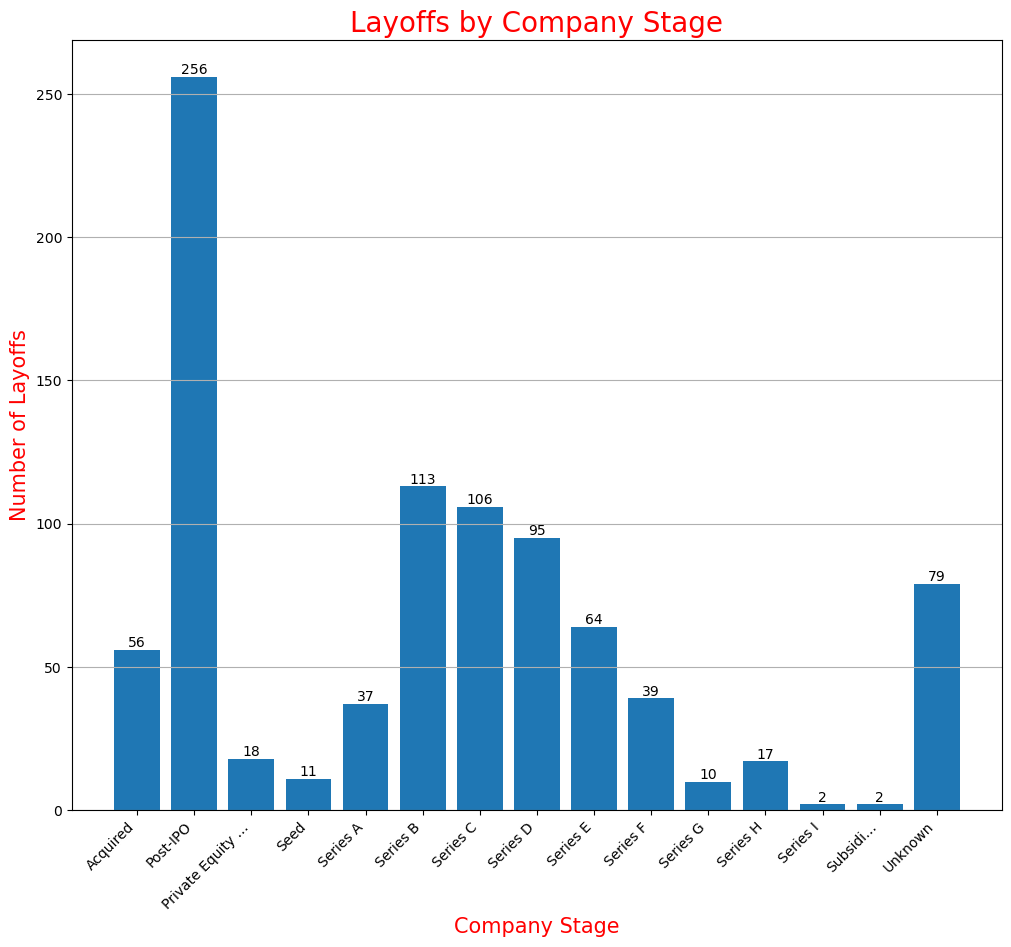

In [645]:
# Show number of layoffs using a bar chart

plt.figure (figsize=(12, 10))
bars = plt.bar(stage_group_df.index, stage_group_df)
plt.xlabel('Company Stage', color = 'red', fontsize = 15)
plt.xticks(rotation=45, ha= 'right')
plt.ylabel('Number of Layoffs', color = 'red', fontsize = 15)
plt.grid(axis = 'y')
plt.title('Layoffs by Company Stage', color = 'red', fontsize = 20)

# Iterating over the bars one-by-one
for bar in bars:
    height = bar.get_height()
    width = bar.get_width()
    plt.text(bar.get_x() + bar.get_width()/2, height, height, ha='center', va='bottom')

plt.show()


In [599]:
# Group data by company stage and calculate summary statistics for layoffs
layoffs_summary = df_a.groupby('Stage')['Laid_Off'].describe()

# Print the summary statistics
print(layoffs_summary)

                  count        mean          std    min     25%    50%  \
Stage                                                                    
Acquired           56.0  275.160714   403.501753   12.0   59.75  100.0   
Post-IPO          256.0  735.265625  1771.268981   16.0  100.00  205.5   
Private Equity …   18.0  190.666667   431.922379   10.0   39.25   97.5   
Seed               11.0   15.181818    11.196590    3.0    6.00   13.0   
Series A           37.0   37.000000    41.953678    4.0   16.00   20.0   
Series B          113.0   77.115044   130.003142    5.0   30.00   42.0   
Series C          106.0   83.613208   133.605145   10.0   25.00   46.5   
Series D           95.0  104.621053    94.027517    9.0   40.00   70.0   
Series E           64.0  143.765625   162.996615   19.0   68.00  100.0   
Series F           39.0  161.897436   208.406460   20.0   77.00  100.0   
Series G           10.0  172.200000   103.510386   60.0   73.50  175.0   
Series H           17.0  284.176471   

In [600]:
# Testing to determine if there is a relationship between the number of layoffs and the company stage
# Group data by company stage
stage_group = [df_a[df_a['Stage'] == stage]['Laid_Off'] for stage in stage_group_df.index]



In [601]:
# Perform the ANOVA (Analysis of Variance) test. F-statistic and p-value are returned
# F-statistic is a measure of the variance between the group means and the variance within the groups.
# A large F-statistic indicates a large variance between the group means and a small variance within the groups.
# A small p-value indicates that the observed variance is unlikely to occur by chance.

f_stat, p_value = f_oneway(*stage_group)

In [602]:
# Set significance level. If p-value is less than alpha, reject the null hypothesis.
# A common significance level is 0.05

alpha = 0.05

# Test the hypothesis. If p-value is less than alpha, reject the null hypothesis
if p_value < alpha:
    print(f'The p-value is {p_value}. There is a significant difference between the number of layoffs by company stage.')
else:
    print(f'The p-value is {p_value}. There is no significant difference between the number of layoffs by company stage.')

The p-value is 9.736790275978165e-10. There is a significant difference between the number of layoffs by company stage.


In [603]:
# Show the ANOVA results
print(f'F-statistic: {f_stat}, p-value: {p_value}')

F-statistic: 5.291685286657989, p-value: 9.736790275978165e-10


Because the p-value is significantly smaller than the .05 significance level, there is good evidence that the company stage does have an impact on the number of layoffs.

In [604]:
# Group data by company stage and count the unique values in the Percentage column

stage_count_df = df_a.groupby('Stage')['Percentage'].count()
stage_count_df
print(stage_count_df.index)


Index(['Acquired', 'Post-IPO', 'Private Equity …', 'Seed', 'Series A',
       'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G',
       'Series H', 'Series I', 'Subsidi…', 'Unknown'],
      dtype='object', name='Stage')


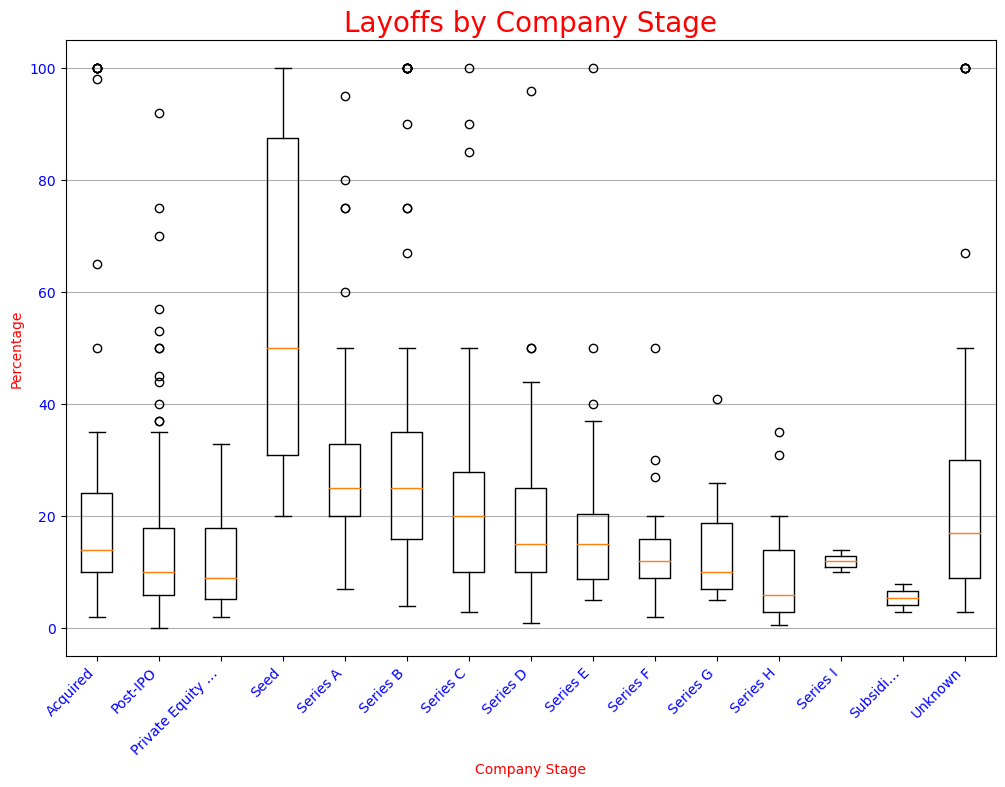

In [621]:
# Show the percentages of layoffs by company stage using a box plot

plt.figure (figsize=(12, 8))
plt.boxplot([df_a[df_a['Stage'] == stage]['Percentage'] for stage in stage_count_df.index], labels=stage_count_df.index)
plt.xlabel('Company Stage', color = 'red')
plt.xticks(rotation=45, ha = 'right')
plt.xticks(color='blue')
plt.ylabel('Percentage', color = 'red')
plt.yticks(color='blue')
plt.grid(axis = 'y')
plt.title('Layoffs by Company Stage', color = 'red', fontsize = 20)
plt.show()

In [606]:
# Group data by company stage and calculate the average percentage of layoffs

average_percentage_by_stage = df_a.groupby('Stage')['Percentage'].mean()
print(average_percentage_by_stage)

Stage
Acquired            25.809524
Post-IPO            14.031814
Private Equity …    11.666667
Seed                57.000000
Series A            32.513514
Series B            31.362832
Series C            21.716981
Series D            18.968421
Series E            18.166667
Series F            13.666667
Series G            14.800000
Series H            10.147888
Series I            12.000000
Subsidi…             5.500000
Unknown             24.773040
Name: Percentage, dtype: float64


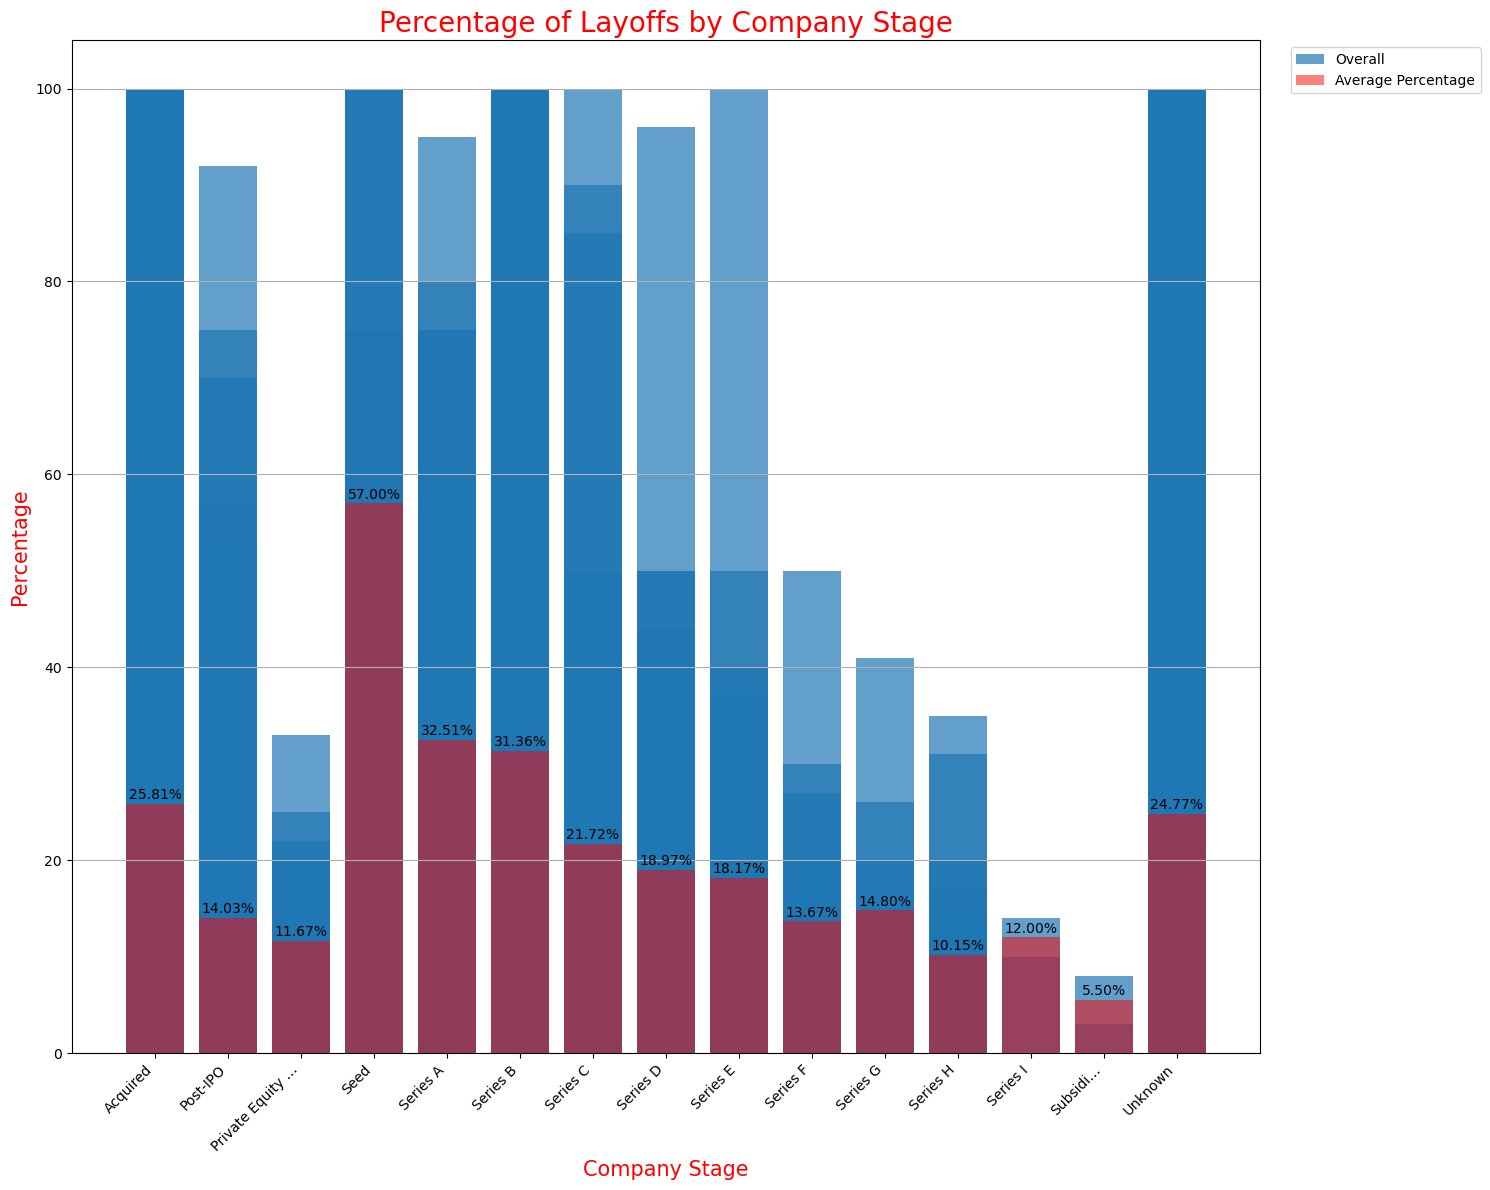

In [642]:
# Show the average percentage of layoffs by company stage using a bar chart
df_sorted = df_a.sort_values(by='Stage')

bar_width = 0.35

plt.figure(figsize=(15, 12))
plt.bar(df_sorted['Stage'], df_sorted['Percentage'], alpha=0.7, label='Overall')
average_percentage_by_stage = df_sorted.groupby('Stage')['Percentage'].mean()
plt.bar(average_percentage_by_stage.index, average_percentage_by_stage.values, alpha=0.5, label='Average Percentage', color = 'red')
for i, value in enumerate(average_percentage_by_stage.values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', color='black')

plt.xlabel('Company Stage', color = 'red', fontsize = 15)
plt.ylabel('Percentage', color = 'red', fontsize = 15) 
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of Layoffs by Company Stage', color = 'red', fontsize = 20)
plt.grid(axis='y')
plt.legend(loc = 'upper left', bbox_to_anchor = (1.02, 1))
plt.tight_layout()
plt.show()

The Post_IPO companies had the largest number of layoffs, but not the largest percentage. Seed-stage funded and start-up companies were disproportinately affected over the last four years.